### Decision Trees
#### Objectives
- Develop a classification model using Decision Tree Algorithm

In [2]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [3]:
my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [5]:
# size of data
my_data.shape

(200, 6)

##### Pre-processing
Using my_data as the Drug.csv data read by pandas, declare the following variables:
- X as the Feature Matrix (data of my_data)
- y as the response vector (target)

In [9]:
my_data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [11]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355, 'drugY'],
       [47, 'M', 'LOW', 'HIGH', 13.093, 'drugC'],
       [47, 'M', 'LOW', 'HIGH', 10.114, 'drugC'],
       [28, 'F', 'NORMAL', 'HIGH', 7.798, 'drugX'],
       [61, 'F', 'LOW', 'HIGH', 18.043, 'drugY']], dtype=object)

As you may figure out, some features in this dataset are categorical, such as Sex or BP. Unfortunately, Sklearn Decision Trees does not handle categorical variables. We can still convert these features to numerical values using LabelEncoder to convert the categorical variable into numerical variables.

In [24]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn import preprocessing

# Example data, simulating a part of your dataset
data = pd.read_csv('drug200.csv')
# Convert to DataFrame
df = pd.DataFrame(data)

# Display the DataFrame and its shape
print(df)
print(df.shape)

# Initialize the LabelEncoders
le_sex = preprocessing.LabelEncoder()
le_BP = preprocessing.LabelEncoder()
le_Chol = preprocessing.LabelEncoder()

# Fit the LabelEncoders on the unique values
le_sex.fit(['F', 'M'])
le_BP.fit(['LOW', 'NORMAL', 'HIGH'])
le_Chol.fit(['NORMAL', 'HIGH'])

# Transform the data
df['Sex'] = le_sex.transform(df['Sex'])
df['BP'] = le_BP.transform(df['BP'])
df['Cholesterol'] = le_Chol.transform(df['Cholesterol'])

# Display the transformed DataFrame
print(df.head())



     Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]
(200, 6)
   Age  Sex  BP  Cholesterol  Na_to_K   Drug
0   23    0   0            0   25.355  drugY
1   47    1   1            0   13.093  drugC
2   47    1   1            0   10.114  drugC
3   28    0   2            0    7.798  drugX
4   61    0   1            0   18.043  drugY


In [32]:
y = data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

#### Setting up the Decision Tree
We will be using train/test splt on our decision tree. Let's import train_test_split from sklearn.cross_validation

In [26]:
from sklearn.model_selection import train_test_split

Now train_test_split will return 4 different parameters. We will name them:
X_trainset, X_testset, y_trainset, y_testset

The train_test_split will need the parameters:
X, y, test_size=0.3, and random_state=3.

The X and y are the arrays required before the split, the test_size represents the ratio of the testing dataset, and the random_state ensures that we obtain the same splits.

In [27]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [28]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (140, 6) &  Size of Y training set (140,)


#### Modeling
We will first create an instance of the DecisionTreeClassifier called drugTree.
Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node.

In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Initialize the DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Fit the model on the training data
drugTree.fit(X_train, y_train)

# Print the first few rows of the transformed dataset and the model parameters
print("Transformed dataset:\n", df.head())
print("\nModel parameters:\n", drugTree.get_params())


Transformed dataset:
    Age  Sex  BP  Cholesterol  Na_to_K  Drug
0   23    0   0            0   25.355     2
1   47    1   1            0   13.093     0
2   47    1   1            0   10.114     0
3   28    0   2            0    7.798     1
4   61    0   1            0   18.043     2

Model parameters:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


#### Prediction

In [42]:
predTree = drugTree.predict(X_test)
print("\nPredictions on test set:\n", predTree)
print("\nActual values of the test set:\n", y_test.values)


Predictions on test set:
 [0 0]

Actual values of the test set:
 [1 2]


In [43]:
print (predTree [0:5])
print (y_testset [0:5])

[0 0]
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


#### Evaluation
Accuracy classification score computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

DecisionTree's Accuracy:  0.0


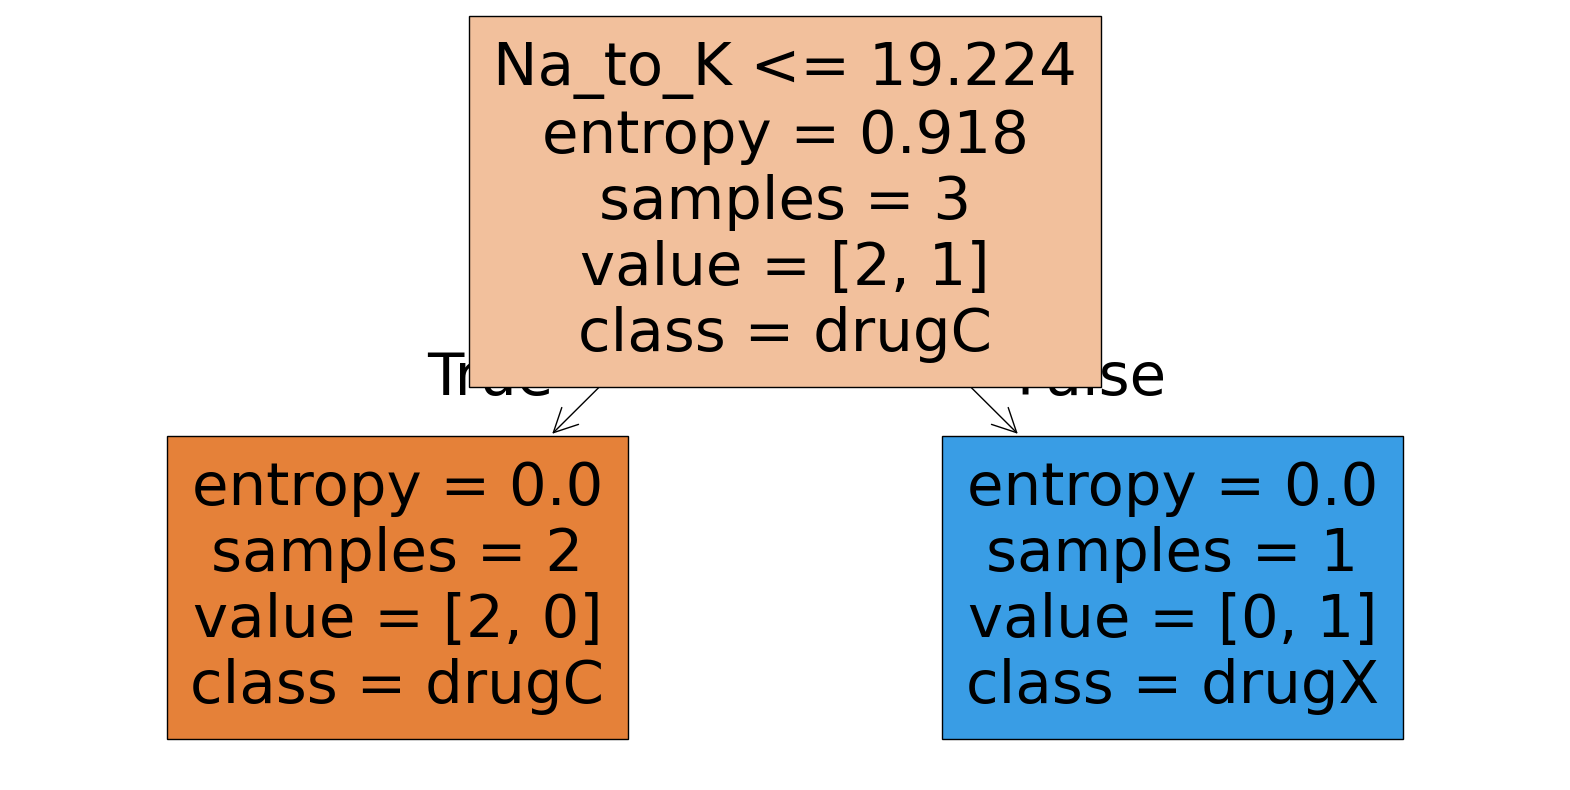

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import preprocessing, metrics
import matplotlib.pyplot as plt
accuracy = metrics.accuracy_score(y_test, predTree)
print("DecisionTree's Accuracy: ", accuracy)

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(drugTree, feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], class_names=le_drug.classes_, filled=True)
plt.show()

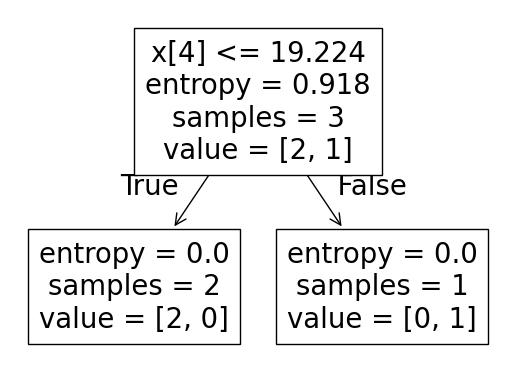

In [47]:
tree.plot_tree(drugTree)
plt.show()